In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

**Read data**

In [3]:
df = pd.read_csv('Verizon Data.csv')
df['gender'] = df['gender'].map({1: 'male', 2: 'female'})
df = df[(df['age'] >= 16) & (df['age'] != 99)]
month_mapping = {     1: 'January',     2: 'February',     3: 'March',     4: 'April',     5: 'May',     6: 'June',     7: 'July',     8: 'August',     9: 'September',     10: 'October',     11: 'November',     12: 'December' }  
df['month'] = df['month'].map(month_mapping)
payment_mapping = {    1: 'Credit Card', 3: 'Cash' , 4: 'Check', 5: 'Debit Card' }
df['pmttype'] = df['pmttype'].map(payment_mapping)
df = df.drop(columns=['year', 'day'])

In [4]:
df.describe()

,price,downpmt,monthdue,payment_left,monthly_payment,credit_score,age,default
count,22697.000000,22697.000000,22697.000000,22697.000000,22697.000000,22697.000000,22697.00000,22697.000000
mean,988.876268,180.876777,8.256669,807.999491,145.218148,1.984007,31.66511,0.119575
std,401.875100,274.421316,6.868090,452.615373,191.598256,2.330935,10.61957,0.324471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.00000,0.000000
25%,699.000000,40.000000,5.500000,566.160000,66.352941,0.000000,24.00000,0.000000
50%,998.000000,100.000000,6.000000,854.000000,118.195000,1.000000,29.00000,0.000000
75%,1238.000000,175.000000,9.000000,1099.000000,184.666667,4.000000,37.00000,0.000000
max,5006.640000,5006.640000,120.000000,3890.750000,19639.750000,8.000000,79.00000,1.000000


In [5]:
df = pd.get_dummies(df, columns=[ 'gender', 'pmttype'])

In [6]:
df.head()

,month,price,downpmt,monthdue,payment_left,monthly_payment,credit_score,age,default,gender_female,gender_male,pmttype_Cash,pmttype_Check,pmttype_Credit Card,pmttype_Debit Card
2116,April,1152.32,275.0,5.50,877.32,159.512727,1,16,0,True,False,False,False,False,True
2117,August,1108.00,58.0,5.50,1050.00,190.909091,0,16,0,False,True,False,False,True,False
2118,November,1975.00,400.0,1.37,1575.00,1149.635036,4,16,0,False,True,False,False,False,True
2119,November,1427.00,713.5,6.00,713.50,118.916667,0,16,0,False,True,False,False,False,True
2120,February,489.00,244.5,8.00,244.50,30.562500,0,16,0,False,True,False,False,False,True


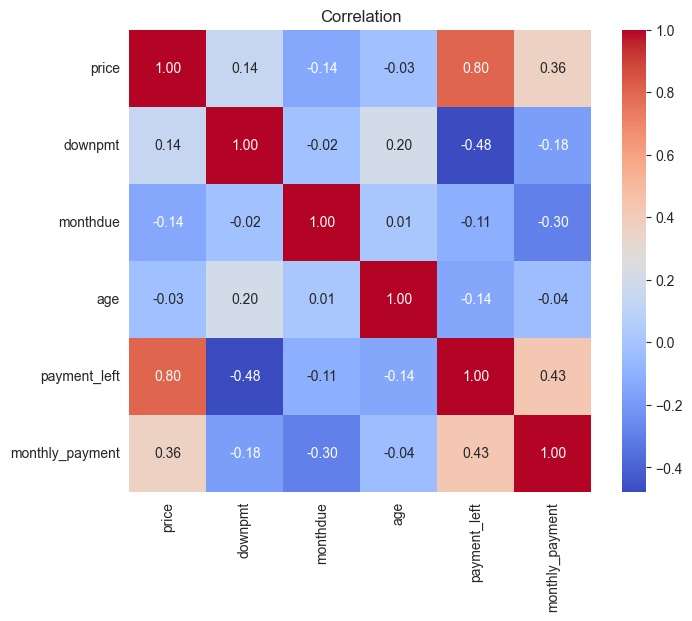

In [7]:
columns_of_interest = ['price', 'downpmt', 'monthdue', 'age','payment_left','monthly_payment']

# Calculate correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation')
plt.show()

In [8]:
X = df.drop(columns=['default','month'])
y = df['default']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [11]:
model = LogisticRegression(class_weight="balanced")
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [12]:
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

Accuracy: 0.8312775330396476


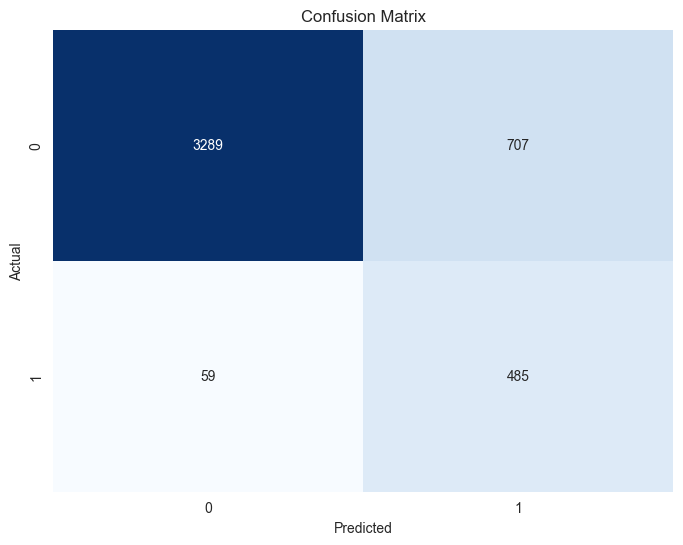

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
print("\nConfusion Matrix for Logistic Regression Model:\n\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report for Logistic Regression Model:\n\n", classification_report(y_test, y_pred))


Confusion Matrix for Logistic Regression Model:

 [[3289  707]
 [  59  485]]

Classification Report for Logistic Regression Model:

               precision    recall  f1-score   support

           0       0.98      0.82      0.90      3996
           1       0.41      0.89      0.56       544

    accuracy                           0.83      4540
   macro avg       0.69      0.86      0.73      4540
weighted avg       0.91      0.83      0.86      4540


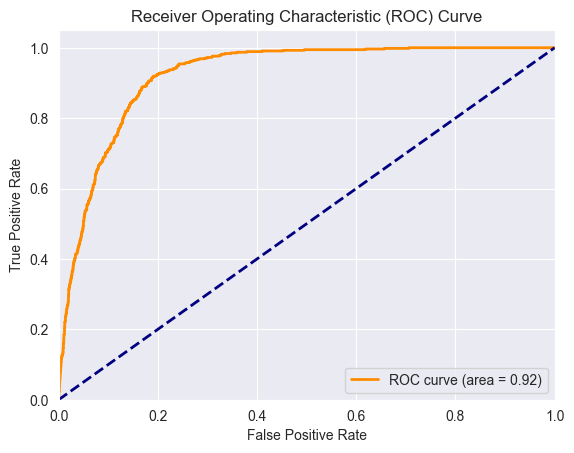

In [15]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [16]:
def coefficient_arrow(coef):
    if coef > 0:
        return '\u2191'  # Up arrow symbol
    elif coef < 0:
        return '\u2193'  # Down arrow symbol
    else:
        return '-'  # Neutral symbol

In [17]:
coefficients = model.coef_
coef_df = pd.DataFrame({'Feature': X.columns, 
                        'Coefficient': coefficients[0],
                        'Default Probability': [coefficient_arrow(coef) for coef in coefficients[0]]})

In [18]:
coef_df = coef_df.reindex(list(coef_df['Coefficient'].abs().sort_values(ascending=False).index))
coef_df

,Feature,Coefficient,Default Probability
1,downpmt,-2.650531,↓
5,credit_score,-1.728986,↓
3,payment_left,1.180832,↑
11,pmttype_Credit Card,0.910470,↑
10,pmttype_Check,-0.819787,↓
12,pmttype_Debit Card,-0.493712,↓
0,price,-0.461878,↓
9,pmttype_Cash,0.357354,↑
6,age,-0.214787,↓
7,gender_female,-0.083435,↓


### <>
<!-- import statsmodels.api as sm
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
significant_results = result.summary2().tables[1].loc[result.pvalues < 0.05]
print(significant_results)
non_significant_results = result.summary2().tables[1].loc[result.pvalues >= 0.05]
print(non_significant_results) -->

### XGBoost

In [19]:
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)
model = xgb.XGBClassifier(scale_pos_weight=ratio)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

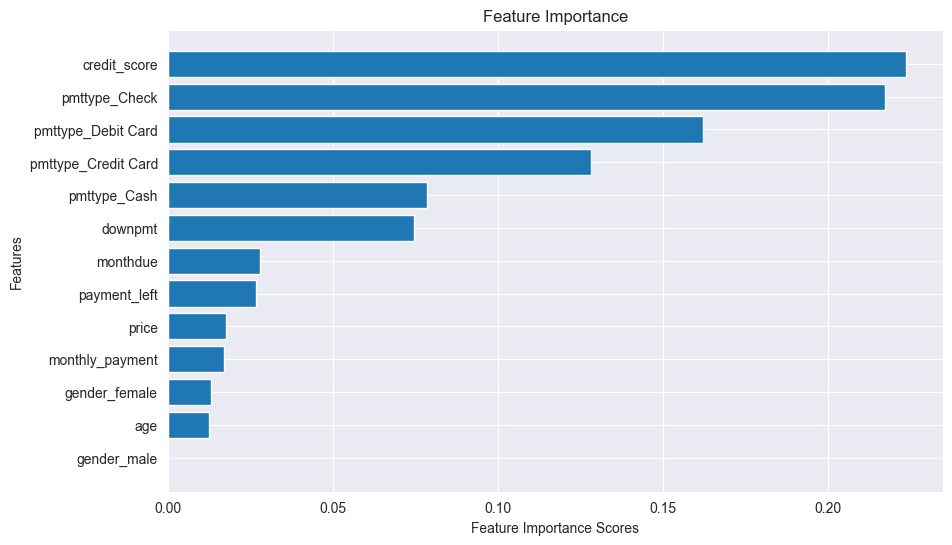

In [20]:
importance_scores = model.feature_importances_

# Sort features by importance scores
sorted_indices = np.argsort(importance_scores)[::]

# Extract feature names
sorted_features = X_train.columns[sorted_indices]
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance_scores)), importance_scores[sorted_indices], align='center')
plt.yticks(range(len(importance_scores)), sorted_features)
plt.xlabel('Feature Importance Scores')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

Accuracy: 0.8872246696035242


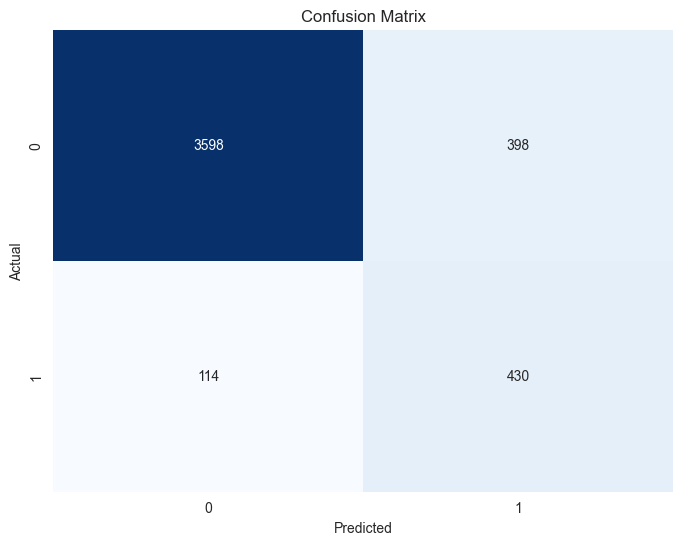

In [21]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] 

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Matrix per 1000

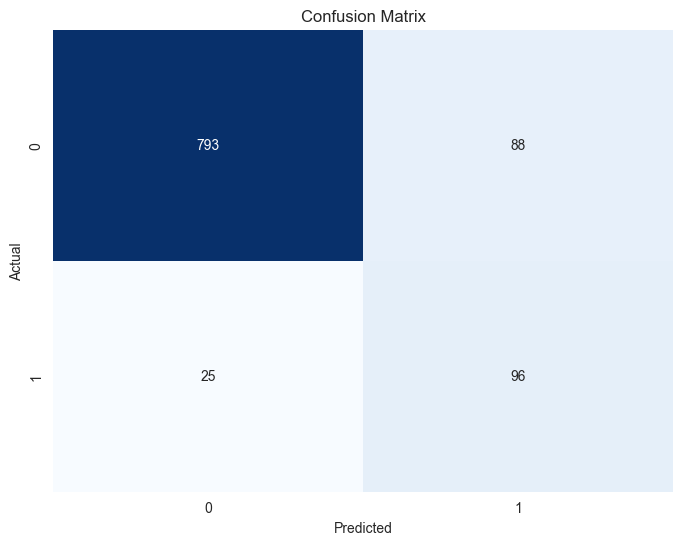

In [22]:
cm_normalized = cm/np.sum(cm)
cm_per_1000 =1000*cm_normalized
cm_per_1000 =np.round(cm_per_1000).astype(int)
cm_per_1000
cm_per_1000[1][1] =cm_per_1000[1][1]+np.sum(cm_per_1000)-1000
plt.figure(figsize=(8, 6))
sns.heatmap(cm_per_1000, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
print("\nClassification Report for Random Forest Model:\n\n", classification_report(y_test, y_pred))


Classification Report for Random Forest Model:

               precision    recall  f1-score   support

           0       0.97      0.90      0.93      3996
           1       0.52      0.79      0.63       544

    accuracy                           0.89      4540
   macro avg       0.74      0.85      0.78      4540
weighted avg       0.92      0.89      0.90      4540


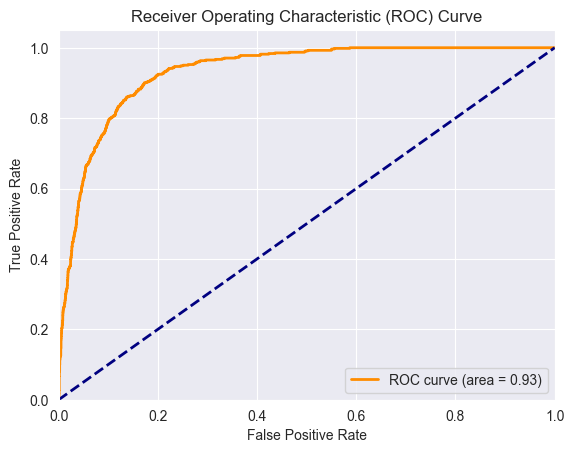

In [24]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [48]:
import pandas as pd
import numpy as np

data2 = {
    'price': [100],
    'downpmt': [10],
    'monthdue': [10],
    'payment_left': [90],
    'monthly_payment': [9],
    'credit_score': [5],
    'age': [21],
    'gender_female': [True],
    'gender_male':[False],
    'pmttype_Cash':[True],
    'pmttype_Check':[False],
    'pmttype_Credit Card':[False],
    'pmttype_Debit Card':[False]
}

df2 = pd.DataFrame(data2)



In [49]:
df2

,price,downpmt,monthdue,payment_left,monthly_payment,credit_score,age,gender_female,gender_male,pmttype_Cash,pmttype_Check,pmttype_Credit Card,pmttype_Debit Card
0,100,10,10,90,9,5,21,True,False,True,False,False,False


0

DS MODEL UI

In [26]:
X_test

,price,downpmt,monthdue,payment_left,monthly_payment,credit_score,age,gender_female,gender_male,pmttype_Cash,pmttype_Check,pmttype_Credit Card,pmttype_Debit Card
6481,910.54,5.00,5.83,905.54,155.324185,0,23,False,True,False,False,True,False
4827,1388.00,150.00,9.00,1238.00,137.555556,0,21,False,True,True,False,False,False
11121,779.00,50.00,17.00,729.00,42.882353,1,27,True,False,False,False,True,False
5415,899.00,250.00,5.50,649.00,118.000000,6,22,True,False,False,False,False,True
10146,1485.12,250.00,6.00,1235.12,205.853333,0,26,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16176,1537.12,50.00,6.00,1487.12,247.853333,0,32,False,True,True,False,False,False
12308,523.23,523.23,8.00,0.00,0.000000,3,28,False,True,False,False,True,False
16209,874.00,19.00,7.00,855.00,122.142857,0,32,False,True,True,False,False,False
5772,1297.92,25.00,6.50,1272.92,195.833846,0,22,True,False,False,False,True,False


when you sign up for a phone plan,  you theres a price, and then you have a downpayment.

Then you pay off the plan over a course of a few months.
Do you determine the months based on what you want to pay monthly, or what you pay monthly based on the points?

Basically, I'm working on a UI that will help predict customer default for Verizon based on attributes of their application.  and I don't know whether to take months of payment as an input, or monthly payment value as an input 

In [27]:
# Logical structure:

# Take in Age
# Take in Gender

# Take in price as a float input
# Take in downpayment as a float input
# Create a payment_left values by the following math  (price-downpayment)

# Ask user:
    # Do you know your exact credit score?
        # If yes, then input exact credit score and use the get_credit_score_bin to bin it 
        # If no, give dropdown ranges of scores and then bin from 0-8


# Ask user:
    # Do you want to determine your payment plan by setting the amount of monthly payment, or by setting amount of months?
    # Use a dropdown to select one.
    
    
# If monthly payment selected, take in monthly_payment as a float
    # Then set monthdue= payment_left / monthly_payment
        # maybe later add in logic to tell them how much cheaper last payment will be, if not clean division. 
    
# If month amount selected, take in monthdue as an integer.
    # set monthly_payment = payment_left / monthdue and set 


# Payment type: dropdown



In [28]:
850-300

550

In [29]:
550/8

68.75

In [30]:
list1=[]

for x in range(300,900,int(np.ceil(550/9))):
    print(x)
    list1.append(x)

300
362
424
486
548
610
672
734
796
858


In [31]:
def get_credit_score_bin(given_score):
    if given_score>=300 and given_score<362:
        credit_score=0
    elif given_score>=362 and given_score<424:
        credit_score=1
    elif given_score>=424 and given_score<486:
        credit_score=2
    elif given_score>=486 and given_score<548:
        credit_score=3
    elif given_score>=548 and given_score<610:
        credit_score=4
    elif given_score>=610 and given_score<672:
        credit_score=5
    elif given_score>=672 and given_score<734:
        credit_score=6
    elif given_score>=734 and given_score<796:
        credit_score=7
    elif given_score>=796:
        credit_score=8
    
    return(credit_score)

In [32]:
get_credit_score_bin(300)

0

In [33]:
import tkinter as tk

In [34]:
from tkinter import ttk, messagebox

In [35]:
def calculate_payment():
    price

In [36]:
print(X_test.head(1))

       price  downpmt  monthdue  payment_left  monthly_payment  credit_score  \
6481  910.54      5.0      5.83        905.54       155.324185             0   

      age  gender_female  gender_male  pmttype_Cash  pmttype_Check  \
6481   23          False         True         False          False   

      pmttype_Credit Card  pmttype_Debit Card  
6481                 True               False  


In [37]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd


In [38]:
# payment_mapping = {    1: 'Credit Card', 3: 'Cash' , 4: 'Check', 5: 'Debit Card'}
X_test

,price,downpmt,monthdue,payment_left,monthly_payment,credit_score,age,gender_female,gender_male,pmttype_Cash,pmttype_Check,pmttype_Credit Card,pmttype_Debit Card
6481,910.54,5.00,5.83,905.54,155.324185,0,23,False,True,False,False,True,False
4827,1388.00,150.00,9.00,1238.00,137.555556,0,21,False,True,True,False,False,False
11121,779.00,50.00,17.00,729.00,42.882353,1,27,True,False,False,False,True,False
5415,899.00,250.00,5.50,649.00,118.000000,6,22,True,False,False,False,False,True
10146,1485.12,250.00,6.00,1235.12,205.853333,0,26,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16176,1537.12,50.00,6.00,1487.12,247.853333,0,32,False,True,True,False,False,False
12308,523.23,523.23,8.00,0.00,0.000000,3,28,False,True,False,False,True,False
16209,874.00,19.00,7.00,855.00,122.142857,0,32,False,True,True,False,False,False
5772,1297.92,25.00,6.50,1272.92,195.833846,0,22,True,False,False,False,True,False


V2



In [81]:

type(model)
import pickle
pickle.dump(model, open("xgb_model_verizon.pkl", "wb"))

In [39]:

import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd


In [77]:
def get_model_prediction(givendf):
    if model.predict(givendf)[0]==0:
        return "Predicted to Pay"
    #elif model.predict(givendf)[1]==1:
     #   return "Predicted to Default"
    elif model.predict(givendf)==[1]:
        return("Predicted to Default")
    else:
        return(model.predict(givendf))

In [78]:
def submit_action():
    try:
        age = int(age_entry.get())
        if not isinstance(age,int):
            raise ValueError('ERROR: Age')

        gender = gender_var.get()
        if gender not in ['M','F']:
            raise ValueError("Unprepared for gender entry")


        price = float(price_entry.get())
        if not isinstance(price,float):
            raise Error("ERROR: Price")


        downpmt = float(downpmt_entry.get())
        if not isinstance(downpmt,float):
            raise ValueError("ERROR: Down payment")

        payment_left = price - downpmt


        pmttype=pmt_type_var.get()

        if credit_score_var.get() == "Enter exact score":
            credit_score = int(credit_score_entry.get())
            credit_bin = get_credit_score_bin(credit_score)
        else:
            # Assuming dropdown has format "300-399", "400-499", etc.
            range_start = int(credit_score_var.get().split('-')[0])
            credit_bin = get_credit_score_bin(range_start)

        payment_option = payment_option_var.get()
        if payment_option == "Set Monthly Payment":
            monthly_payment = float(monthly_payment_entry.get())
            monthdue = payment_left / monthly_payment
        elif payment_option == "Set Number of Months":
            monthdue = int(monthdue_entry.get())
            monthly_payment = payment_left / monthdue


        data = {
            'price': [price],
            'downpmt': [downpmt],
            'monthdue': [monthdue],
            'payment_left': [payment_left],
            'monthly_payment': [monthly_payment],
            'credit_score': [credit_bin],
            'age': [age],
            'gender_female': [gender=="F"],
            'gender_male':[gender=="M"],
            'pmttype_Cash':[pmttype=="Cash"],
            'pmttype_Check':[pmttype=="Check"],
            'pmttype_Credit Card':[pmttype=="Credit Card"],
            'pmttype_Debit Card':[pmttype=="Debit Card"]
        }
        df = pd.DataFrame(data)
        try: 
            print(get_model_prediction(df))
        except:
            print('err')
        # Or replace this with your model prediction call

    except ValueError as e:
        messagebox.showerror("Input Error", f"Please enter valid numeric values. Error: {e}")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred. Please check your inputs. Error: {e}")

In [79]:

# Create the main window
root = tk.Tk()
root.title("Loan Payment Calculator")

# Entry fields
tk.Label(root, text="Age:").grid(row=0, column=0)
age_entry = tk.Entry(root)
age_entry.grid(row=0, column=1)

tk.Label(root, text="Gender (M/F):").grid(row=1, column=0)
gender_var = tk.StringVar()
gender_combobox = ttk.Combobox(root, textvariable=gender_var, values=['M', 'F'])
gender_combobox.grid(row=1, column=1)

tk.Label(root, text="Price:").grid(row=2, column=0)
price_entry = tk.Entry(root)
price_entry.grid(row=2, column=1)

tk.Label(root, text="Down Payment:").grid(row=3, column=0)
downpmt_entry = tk.Entry(root)
downpmt_entry.grid(row=3, column=1)

# Payment Type Options
tk.Label(root,text='Payment Type').grid(row=4,column=0)
pmt_type_var=tk.StringVar()
pmt_type_combo_box=ttk.Combobox(root,textvariable=pmt_type_var,values=['Credit Card','Cash','Check','Debit Card'])
pmt_type_combo_box.grid(row=4,column=1)

# Credit score options
credit_score_var = tk.StringVar(value="Enter exact score")
tk.Radiobutton(root, text="Enter exact score", variable=credit_score_var, value="Enter exact score").grid(row=5, column=0)
credit_score_entry = tk.Entry(root)
credit_score_entry.grid(row=5, column=1)
credit_score_options = ["300-399", "400-499", "500-599", "600-699", "700-799", "800-850"]
tk.Label(root, text="Or select a score range:").grid(row=6, column=0)
credit_score_menu = ttk.Combobox(root, textvariable=credit_score_var, values=credit_score_options)
credit_score_menu.grid(row=6, column=1)

# Payment plan options
payment_option_var = tk.StringVar(value="Set Monthly Payment")
tk.Radiobutton(root, text="Set Monthly Payment", variable=payment_option_var, value="Set Monthly Payment").grid(row=7, column=0)
monthly_payment_entry = tk.Entry(root)
monthly_payment_entry.grid(row=7, column=1)
tk.Radiobutton(root, text="Set Number of Months", variable=payment_option_var, value="Set Number of Months").grid(row=8, column=0)
monthdue_entry = tk.Entry(root)
monthdue_entry.grid(row=8, column=1)

# Submit button
submit_button = tk.Button(root, text="Submit", command=submit_action)
submit_button.grid(row=9, column=1)

root.mainloop()


Predicted to Default
Predicted to Default
Predicted to Pay
